<a href="https://colab.research.google.com/github/L-ansari/Natural-Language-Processing-tasks/blob/master/scentic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install senticnet


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [152]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [153]:
df_train= pd.read_csv(Path('/content/drive/My Drive/DSP/data/bachelor/CLPsych_train.csv'))

In [154]:
df_train.head()

,label,text
0,depression_ctrl,Game over RT : Life is so unpredictable. Be gr...
1,depression,Happy ! Guys: please check your balls monthly ...
2,ptsd_ctrl,You gotta enjoy the view RT : i want a boyfrie...
3,ptsd_ctrl,I love that I'm so chill about everything RT :...
4,depression_ctrl,Photo: lkfrannyfrano: hotshxxt: migzfromatx: s...


In [155]:
from senticnet.senticnet import SenticNet


In [156]:
sn = SenticNet()
concept_info = sn.concept('love')
polarity_label = sn.polarity_label('love')
polarity_value = sn.polarity_value('love')
moodtags = sn.moodtags('love')
semantics = sn.semantics('love')
sentics = sn.sentics('love')

In [157]:
print(concept_info )
print(polarity_label )
print(polarity_value )
print(moodtags )
print(semantics )
print(sentics )

{'polarity_label': 'positive', 'polarity_value': '0.83', 'sentics': {'introspection': '0.897', 'temper': '0', 'attitude': '0', 'sensitivity': '0.762'}, 'moodtags': ['#joy', '#eagerness'], 'semantics': ['desire_succeed', 'excitement', 'lust', 'passion', 'sexuality']}
positive
0.83
['#joy', '#eagerness']
['desire_succeed', 'excitement', 'lust', 'passion', 'sexuality']
{'introspection': '0.897', 'temper': '0', 'attitude': '0', 'sensitivity': '0.762'}


In [158]:
print(type(float(polarity_value)))

<class 'float'>


In [159]:
sentics['introspection']


'0.897'

In [160]:
def get_feature(message):
  """This function gives out a dataframe of extracted features"""
  sn = SenticNet()

  polarity_value=0
  polarity_label=0
  introspection=0
  sensitivity=0
  temper=0
  attitude=0

  for word in (message):
    try:
      concept = sn.concept(word)
      pol_value = float(concept['polarity_value'])
      pol_label=concept['polarity_label']
      intros=float(concept['sentics']['introspection'])
      sensit=float(concept['sentics']['sensitivity'])
      temp=float(concept['sentics']['temper'])
      attit=float(concept['sentics']['attitude'])

      if  concept['polarity_label']=='positive':
        pol_label =1
      else:
        pol_label=0



      polarity_value += pol_value
      polarity_label +=pol_label
      introspection +=intros
      sensitivity +=sensit
      temper +=temp
      attitude +=attit

    except KeyError:
        pass
 
    
  return polarity_value , polarity_label, introspection, sensitivity, temper, attitude


In [161]:
  #Test a sentence
sn = SenticNet()
print("(polarity_value, polarity_label, introspection, sensitivity, temper, attitude):=\n ")
get_feature(['I', 'love', 'books'])

(polarity_value, polarity_label, introspection, sensitivity, temper, attitude):=
 


(0.83, 1, 0.897, 0.762, 0.0, 0.0)

In [162]:
df_train['text'][1].lower()

'happy ! guys: please check your balls monthly learn how video love yer mosista rt : heading to post game it up... ... : before i go to sleep, wanna give a shout to . she is the absolute best. that is all! thanks, buddy! {hugs} compassion is the highest form of intelligence. be kind. enjoying solitude doesn\'t make you a loner/loser! {hugs} is the world starting to turn against ? the men who are truly good are amazing men; the ones who behave badly...those dudes are just horrid... "run!" important message: tonight we turn back the clocks. please use this extra hour to test your smoke alarms, carbon... rt : to be more attractive, you should play up your sexiest attributes, so i would like it to be known i have run out of book : a beer dumped on you, what happened there? that sounded heartless. read the feed: i rejected a jerks flirtation! the worst part is how men justify their harmful behaviour &amp; crimes.: this is my story. the truth... to all the awful stories i\'ve read about \'s 

In [163]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
sent = "This is my text, this is a nice way to input text."
word_tokenize(sent)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['This',
 'is',
 'my',
 'text',
 ',',
 'this',
 'is',
 'a',
 'nice',
 'way',
 'to',
 'input',
 'text',
 '.']

In [164]:
#first sentence of train data set
get_feature(word_tokenize(df_train['text'][0].lower()))

(1280.685000000018,
 3481,
 1040.8269999999902,
 831.996999999989,
 38.1649999999999,
 209.0059999999996)

In [165]:
print(df_train.shape[0])

1146


CLPsycke15 Dataset


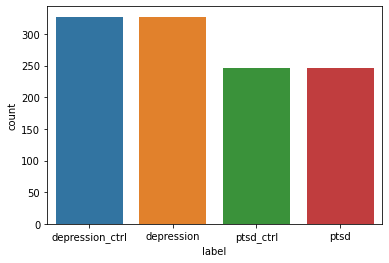

In [166]:
print("CLPsycke15 Dataset")
sns.countplot(x = 'label', data=df_train)


In [76]:
# Subset dataset to only depression and depression_ctrl
#df_train=df_train[(df_train['label']=='depression') | (df_train['label']=='depression_ctrl')]

In [168]:
df_train.isnull().values.any()


False

In [169]:
df_trainn= pd.read_csv(Path('/content/drive/My Drive/DSP/data/bachelor/CLPsych_train_binary.csv'))

In [172]:
print(df_trainn.shape[0])

654


CLPsycke15 Dataset


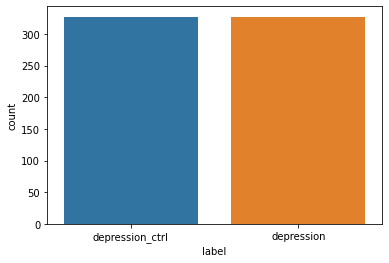

In [173]:
print("CLPsycke15 Dataset")
sns.countplot(x = 'label', data=df_trainn)

In [174]:
df_trainn['polarity_value'] = 0
df_trainn['polarity_label'] = 0
df_trainn['sensitivity'] = 0
df_trainn['introspection'] = 0
df_trainn['temper'] = 0
df_trainn['attitude'] = 0

for i in range(df_trainn.shape[0]):
    polarity_value , polarity_label, introspection, sensitivity, temper, attitude=get_feature (word_tokenize(df_trainn['text'][i].lower()))
    df_trainn['polarity_value'][i] = polarity_value
    df_trainn['polarity_label'][i] = polarity_label
    df_trainn['sensitivity'][i] = sensitivity
    df_trainn['introspection'][i]= introspection
    df_trainn['temper'][i] = temper
    df_trainn['attitude'][i]= attitude
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [175]:
df_trainn.head()


,label,text,polarity_value,polarity_label,sensitivity,introspection,temper,attitude
0,depression_ctrl,Game over RT : Life is so unpredictable. Be gr...,1280,3481,831,1040,38,209
1,depression,Happy ! Guys: please check your balls monthly ...,2149,6548,1431,1670,44,639
2,depression_ctrl,Photo: lkfrannyfrano: hotshxxt: migzfromatx: s...,1795,3707,808,1607,-6,272
3,depression_ctrl,: New videooooOOOoooo at PM UK time!! RT : the...,789,2563,548,831,-78,22
4,depression,:,0,0,0,0,0,0


In [176]:
polarity_value , polarity_label, introspection, sensitivity, temper, attitude

(1454.323000000005,
 2634,
 1396.4640000000047,
 1080.5439999999896,
 28.522000000000013,
 133.24800000000013)

In [177]:
print(df_trainn['label'][1])

depression


In [178]:
dict_cls = {'depression': 1, 'depression_ctrl': 0}
df_trainn['label'] = df_trainn['label'].map(dict_cls)
#y_test = df_test['label'].map(dict_cls)

In [179]:
"""
df_train['label'] = df['label'].astype('category')

encode_map = {
    'depression': 1,
    'depression_ctrl': 0,
    'ptsd':0,
    'ptsd_ctrl':0
}

df['label'].replace(encode_map, inplace=True)
 """

"\ndf_train['label'] = df['label'].astype('category')\n\nencode_map = {\n    'depression': 1,\n    'depression_ctrl': 0,\n    'ptsd':0,\n    'ptsd_ctrl':0\n}\n\ndf['label'].replace(encode_map, inplace=True)\n "

In [180]:
"""
for i in range (0, (df_trainn.shape[0])):
  if (df_trainn['label'][i]=='depression') :
        
    df_trainn['label'][i]= 1 
  else:
        #False
    df_trainn['label'][i]= 0

df_trainn.head()"""

"\nfor i in range (0, (df_trainn.shape[0])):\n  if (df_trainn['label'][i]=='depression') :\n        \n    df_trainn['label'][i]= 1 \n  else:\n        #False\n    df_trainn['label'][i]= 0\n\ndf_trainn.head()"

In [181]:
#scaler = StandardScaler()
#df_train = scaler.fit_transform(df_train)
features = df_trainn[["polarity_value", "polarity_label", "sensitivity", "introspection", "temper", "attitude"]]  
autoscaler = StandardScaler()
features[:] = autoscaler.fit_transform(features.values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [182]:
features.head()

,polarity_value,polarity_label,sensitivity,introspection,temper,attitude
0,0.635321,0.525104,0.752861,0.466465,0.624734,0.374580
1,1.987984,2.527720,2.150160,1.578699,0.668231,3.082949
2,1.436957,0.672672,0.699298,1.467475,0.305755,0.771387
3,-0.128958,-0.074309,0.093801,0.097486,-0.216211,-0.803246
4,-1.357096,-1.747835,-1.182399,-1.369603,0.349252,-0.941814


In [183]:
# Normalize aquired values
df_trainn['polarity_value']=features['polarity_value']
df_trainn['polarity_label']=features['polarity_label']
df_trainn['sensitivity']=features['sensitivity']
df_trainn['introspection']=features['introspection']
df_trainn['temper']=features['temper']
df_trainn['attitude']=features['attitude']

df_trainn.head()

,label,text,polarity_value,polarity_label,sensitivity,introspection,temper,attitude
0,0,Game over RT : Life is so unpredictable. Be gr...,0.635321,0.525104,0.752861,0.466465,0.624734,0.374580
1,1,Happy ! Guys: please check your balls monthly ...,1.987984,2.527720,2.150160,1.578699,0.668231,3.082949
2,0,Photo: lkfrannyfrano: hotshxxt: migzfromatx: s...,1.436957,0.672672,0.699298,1.467475,0.305755,0.771387
3,0,: New videooooOOOoooo at PM UK time!! RT : the...,-0.128958,-0.074309,0.093801,0.097486,-0.216211,-0.803246
4,1,:,-1.357096,-1.747835,-1.182399,-1.369603,0.349252,-0.941814


In [184]:
uniqueValues = df_trainn['label'].unique()
print(uniqueValues)


[0 1]


In [185]:
def get_avg_polarity(message):
  sn = SenticNet()
  count = 0
  summ = 0
  polarity=0
  for word in (message):
    try:
      concept = sn.concept(word)
      polarity = float(concept['polarity_value'])
      print(polarity)
      print(count)
      #break
    except KeyError:
        pass
 
    summ += polarity
    count += 1
  print(summ)
  print(count)
  return summ/count if count>0 else 0


In [186]:
get_avg_polarity(['I', 'book', 'love'])

0.83
2
0.83
3


0.27666666666666667

In [187]:
!pip install twitter

In [188]:
#import urllib2
#import twitter
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import EnglishStemmer
import re
from senticnet.senticnet import SenticNet

In [189]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [190]:
import urllib


In [191]:
def get_words_bag(message):
  wnl = WordNetLemmatizer()
  es = EnglishStemmer()
  for word in re.finditer("\w+", message):
    yield (wnl.lemmatize(word.group()), es.stem(word.group()))

def get_avg_polarity(message):
  threshold = 0.3
  sn = SenticNet()
  count = 0
  summ = 0
  for word_options in get_words_bag(message):
    polarity = 0
    for word in word_options:
      try:
        concept = sn.concept(word)
        polarity = concept['polarity']
        break
      except urllib.error.HTTPError:
        pass #Do next
    if abs(polarity) > threshold:
      summ += polarity
      count += 1

  return summ / count if count > 0 else 0


In [192]:
import torch
import torch.nn as nn
import torch.utils.data as data_utils
import numpy as np
import torch.optim as optim
import torch.nn.functional as F



In [193]:
df_trainn['label'][1]
#torch.LongTensor(0)



1

In [194]:
labels_trainn=torch.tensor(df_trainn['label'][1], dtype=torch.long)
print(labels_trainn)
labels_trainn.view(1,)


tensor(1)


tensor([1])

In [195]:
print(type(df_train.iloc[0,2:]))

<class 'pandas.core.series.Series'>


In [196]:
word_vec = torch.zeros(6)

In [197]:
for i in range (6):
    word_vec[i]= df_trainn.iloc[5,2:][i]
print(word_vec)
print(word_vec.shape)
word_vec.view(1,-1)
print(word_vec.shape)


tensor([-0.4994,  0.3292, -0.7795, -0.6511, -0.9339,  0.1037])
torch.Size([6])
torch.Size([6])


In [198]:
"""feature_number=6 #corpus_size
for i in range(dataframe.shape[0]):
  word_vec = torch.zeros(feature_number) for word in sentence:
  word_vec[i] += 1
return word_vec.view(1, -1)"""



'feature_number=6 #corpus_size\nfor i in range(dataframe.shape[0]):\n  word_vec = torch.zeros(feature_number) for word in sentence:\n  word_vec[i] += 1\nreturn word_vec.view(1, -1)'

In [199]:
class Classifier(nn.Module):  
  """cinsists of a single linear layer with log softmax activation, approximating a logistic regression"""
  def __init__(self, no_classes, feature_size): 
    super(Classifier, self).__init__() 

    self.linear = nn.Linear(feature_size, no_classes) #input & output size

  def forward(self, bow_vec): 
    return F.log_softmax(self.linear(bow_vec), dim=1) #gives out probabilities



In [200]:
no_classes=2
feature_size=6
model = Classifier(no_classes, feature_size)
loss_function = nn.NLLLoss() # Negative log likelihood
optimizer = optim.SGD(model.parameters(), lr=0.01) 


In [201]:
for epoch in range(100): 
  #for sentence, label in training_data: 
  for i in range(df_trainn.shape[0]):
    model.zero_grad() 
    word_vec = torch.zeros(6)

    for j in range (6):
      word_vec[j]= df_trainn.iloc[i,2:][j]
    word_vec=word_vec.view(1,-1)

    target = torch.tensor(df_trainn['label'][i], dtype=torch.long)
    target=target.view(1,)

    log_probs = model(word_vec)  #Forward
    loss = loss_function(log_probs, target) 
    loss.backward()
    optimizer.step() #Update parameters
  if epoch % 10 == 0: 
    print('Epoch: ',str(epoch+1),', Loss: ' +                         str(loss.item()))



Epoch:  1 , Loss: 0.7683664560317993
Epoch:  11 , Loss: 0.6579371094703674
Epoch:  21 , Loss: 0.634242057800293
Epoch:  31 , Loss: 0.6261225938796997
Epoch:  41 , Loss: 0.622495710849762
Epoch:  51 , Loss: 0.6204333901405334
Epoch:  61 , Loss: 0.6190276145935059
Epoch:  71 , Loss: 0.6179642081260681
Epoch:  81 , Loss: 0.6171176433563232
Epoch:  91 , Loss: 0.616425633430481


In [202]:
word_vec = torch.zeros(6)
for i in range (6):
    word_vec[i]= df_trainn.iloc[5,2:][i]
print(word_vec)
print(word_vec.shape)
word_vec=word_vec.view(1,-1)
print(word_vec.shape)
print(word_vec)

tensor([-0.4994,  0.3292, -0.7795, -0.6511, -0.9339,  0.1037])
torch.Size([6])
torch.Size([1, 6])
tensor([[-0.4994,  0.3292, -0.7795, -0.6511, -0.9339,  0.1037]])


In [203]:
def make_predictions(word_vec): 
  with torch.no_grad(): #deactivate the autograd 
    #sentence = data[0] 
    label = "one"
    log_probs = model(word_vec) 
    #print(sentence) 
    print(label + ':') #true label 
    print(np.exp(log_probs)) # convert the log probabilities into probabilities
    return np.exp(log_probs)  #first probability i.e., index 0 refers to 0th class i.e. not depression

a=make_predictions(word_vec)
a.sum()



one:
tensor([[0.3780, 0.6220]])


tensor(1.)

In [204]:
X = df_trainn.iloc[:, 2:]
y = df_trainn.iloc[:, 0]

print(type(X))
X.head()


<class 'pandas.core.frame.DataFrame'>


,polarity_value,polarity_label,sensitivity,introspection,temper,attitude
0,0.635321,0.525104,0.752861,0.466465,0.624734,0.374580
1,1.987984,2.527720,2.150160,1.578699,0.668231,3.082949
2,1.436957,0.672672,0.699298,1.467475,0.305755,0.771387
3,-0.128958,-0.074309,0.093801,0.097486,-0.216211,-0.803246
4,-1.357096,-1.747835,-1.182399,-1.369603,0.349252,-0.941814


In [205]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: label, dtype: int64

In [206]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

In [207]:
print(y_train.shape)

(438,)


In [208]:
#Standardize-Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [209]:
EPOCHS = 100
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [210]:
## train data
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

train_data = trainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train.to_numpy(dtype=np.float64)))
## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test))

In [211]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [212]:
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 6.
        self.layer_1 = nn.Linear(6, 64)  # The input to the first linear layer is 6. 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs): # Takes the input. 
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x) # No sigmoid here since BCEWithLogitsLoss applies sigmoid automatically. 
        
        return x

In [213]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [214]:
model = binaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss() # Used when the output from the network is a tensor of length 2 (final dense layer is of size 2) where both values lie between 0 and 1.
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

binaryClassification(
  (layer_1): Linear(in_features=6, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [215]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [216]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.74325 | Acc: 46.143
Epoch 002: | Loss: 0.68174 | Acc: 58.714
Epoch 003: | Loss: 0.65922 | Acc: 61.857
Epoch 004: | Loss: 0.65241 | Acc: 61.857
Epoch 005: | Loss: 0.62786 | Acc: 66.714
Epoch 006: | Loss: 0.63390 | Acc: 62.571
Epoch 007: | Loss: 0.63303 | Acc: 64.000
Epoch 008: | Loss: 0.62733 | Acc: 63.857
Epoch 009: | Loss: 0.61024 | Acc: 66.286
Epoch 010: | Loss: 0.60512 | Acc: 67.143
Epoch 011: | Loss: 0.60136 | Acc: 68.143
Epoch 012: | Loss: 0.60169 | Acc: 64.429
Epoch 013: | Loss: 0.59824 | Acc: 69.000
Epoch 014: | Loss: 0.59275 | Acc: 68.857
Epoch 015: | Loss: 0.59349 | Acc: 66.714
Epoch 016: | Loss: 0.58712 | Acc: 69.000
Epoch 017: | Loss: 0.58332 | Acc: 67.714
Epoch 018: | Loss: 0.56670 | Acc: 71.143
Epoch 019: | Loss: 0.56993 | Acc: 70.857
Epoch 020: | Loss: 0.55821 | Acc: 69.143
Epoch 021: | Loss: 0.57035 | Acc: 68.714
Epoch 022: | Loss: 0.55637 | Acc: 69.857
Epoch 023: | Loss: 0.54520 | Acc: 71.571
Epoch 024: | Loss: 0.55610 | Acc: 68.857
Epoch 025: | Los

In [217]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [218]:
print(y_test[:10])
print("--------------")
print(y_pred_list[:10])
y_test = [ int(x) for x in y_test ]

y_pred_list = [ int(x) for x in y_pred_list ]


364    1
3      0
569    1
287    1
150    0
99     0
453    1
283    0
517    0
632    0
Name: label, dtype: int64
--------------
[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0]


In [219]:
confusion_matrix(y_test, y_pred_list)

array([[67, 51],
       [36, 62]])

In [220]:
print(classification_report(y_test, y_pred_list))


              precision    recall  f1-score   support

           0       0.65      0.57      0.61       118
           1       0.55      0.63      0.59        98

    accuracy                           0.60       216
   macro avg       0.60      0.60      0.60       216
weighted avg       0.60      0.60      0.60       216

